In [1]:
pip install "numpy>=1.16.5,<1.23.0"

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

from sklearn.preprocessing import StandardScaler
import sklearn
from sklearn import preprocessing
# To perform KMeans clustering 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

C:\Users\USER\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\USER\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\USER\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\USER\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df1 = pd.read_csv('Case Study - Customer.csv', delimiter = ';')
df2 = pd.read_csv('Case Study - Product.csv', delimiter = ';')
df3 = pd.read_csv('Case Study - Store.csv', delimiter = ';')
df4 = pd.read_csv('Case Study - Transaction.csv', delimiter = ';')
print(df4.head())
print(df1.head())

  TransactionID  CustomerID        Date ProductID  Price  Qty  TotalAmount  \
0       TR11369         328  01/01/2022        P3   7500    4        30000   
1       TR16356         165  01/01/2022        P9  10000    7        70000   
2        TR1984         183  01/01/2022        P1   8800    4        35200   
3       TR35256         160  01/01/2022        P1   8800    7        61600   
4       TR41231         386  01/01/2022        P9  10000    1        10000   

   StoreID  
0       12  
1        1  
2        4  
3        4  
4        4  
   CustomerID  Age  Gender Marital Status Income
0           1   55       1        Married   5,12
1           2   60       1        Married   6,23
2           3   32       1        Married   9,17
3           4   31       1        Married   4,87
4           5   58       1        Married   3,57


In [4]:
df = df4.merge(df1, on='CustomerID').merge(df2, on='ProductID').merge(df3, on='StoreID')
df

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,Price_y,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,01/01/2022,P3,7500,4,30000,12,36,0,Married,"10,53",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
1,TR89318,183,17/07/2022,P3,7500,1,7500,12,27,1,Single,"0,18",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
2,TR9106,123,26/09/2022,P3,7500,4,30000,12,34,0,Married,"4,36",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
3,TR4331,335,08/01/2022,P3,7500,3,22500,12,29,1,Single,"4,74",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
4,TR6445,181,10/01/2022,P3,7500,4,30000,12,33,1,Married,"9,94",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5015,TR69555,221,01/08/2022,P4,12000,3,36000,4,23,1,Single,"7,5",Potato Chip,12000,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
5016,TR21587,425,17/10/2022,P4,12000,1,12000,4,58,1,Married,"7,22",Potato Chip,12000,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
5017,TR51183,409,19/07/2022,P4,12000,1,12000,4,47,0,Married,"28,23",Potato Chip,12000,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
5018,TR14963,374,16/12/2022,P4,12000,5,60000,4,32,0,Single,"5,4",Potato Chip,12000,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   TransactionID   5020 non-null   object
 1   CustomerID      5020 non-null   int64 
 2   Date            5020 non-null   object
 3   ProductID       5020 non-null   object
 4   Price_x         5020 non-null   int64 
 5   Qty             5020 non-null   int64 
 6   TotalAmount     5020 non-null   int64 
 7   StoreID         5020 non-null   int64 
 8   Age             5020 non-null   int64 
 9   Gender          5020 non-null   int64 
 10  Marital Status  4976 non-null   object
 11  Income          5020 non-null   object
 12  Product Name    5020 non-null   object
 13  Price_y         5020 non-null   int64 
 14  StoreName       5020 non-null   object
 15  GroupStore      5020 non-null   object
 16  Type            5020 non-null   object
 17  Latitude        5020 non-null   object
 18  Longitud

In [6]:
# basen on SQL Query
def umur(x):
    if x < 30:
        return 'Single'
    else:
        return 'Married'

df['marital2'] = df['Age'].apply(umur)
#isi nan di kolom marital status
df['Marital Status'] = df['Marital Status'].fillna(df['marital2'])
df.isna().sum()

TransactionID     0
CustomerID        0
Date              0
ProductID         0
Price_x           0
Qty               0
TotalAmount       0
StoreID           0
Age               0
Gender            0
Marital Status    0
Income            0
Product Name      0
Price_y           0
StoreName         0
GroupStore        0
Type              0
Latitude          0
Longitude         0
marital2          0
dtype: int64

In [7]:
df = df.drop(columns=['Latitude', 'Longitude', 'Price_y', 'marital2'], axis = 1)
df.columns

Index(['TransactionID', 'CustomerID', 'Date', 'ProductID', 'Price_x', 'Qty',
       'TotalAmount', 'StoreID', 'Age', 'Gender', 'Marital Status', 'Income',
       'Product Name', 'StoreName', 'GroupStore', 'Type'],
      dtype='object')

In [8]:
custcount = df['CustomerID'].value_counts().reset_index()
custcount

,index,CustomerID
0,156,21
1,392,20
2,365,20
3,44,19
4,13,19
...,...,...
442,385,4
443,180,4
444,259,4
445,371,4


ingin memisahkan kustomer yang loyal (datang tiap bulannya/lebih dari sama dengan 12) dan tidak loyal

In [9]:
# 1 loyal, 0 tidak loyal
def loyal(x):
    if x >= 12:
        return 1
    else :
        return 0

custcount['loyal'] = custcount['CustomerID'].apply(loyal)
custcount

,index,CustomerID,loyal
0,156,21,1
1,392,20,1
2,365,20,1
3,44,19,1
4,13,19,1
...,...,...,...
442,385,4,0
443,180,4,0
444,259,4,0
445,371,4,0


In [10]:
custcount = custcount.rename(columns = {'CustomerID': 'kunjungan', 'index':'CustomerID'})
custcount

,CustomerID,kunjungan,loyal
0,156,21,1
1,392,20,1
2,365,20,1
3,44,19,1
4,13,19,1
...,...,...,...
442,385,4,0
443,180,4,0
444,259,4,0
445,371,4,0


In [11]:
groupT = df.groupby(['CustomerID'])['TotalAmount'].median().reset_index()
groupT

,CustomerID,TotalAmount
0,1,32000.0
1,2,19200.0
2,3,28200.0
3,4,29100.0
4,5,45000.0
...,...,...
442,443,21000.0
443,444,23200.0
444,445,27300.0
445,446,32000.0


In [12]:
grouprod = df.groupby(['CustomerID'])['Product Name'].value_counts().unstack().reset_index().fillna(0)
grouprod

Product Name,CustomerID,Cashew,Cheese Stick,Choco Bar,Coffee Candy,Crackers,Ginger Candy,Oat,Potato Chip,Thai Tea,Yoghurt
0,1,2.0,3.0,1.0,2.0,2.0,1.0,3.0,1.0,1.0,1.0
1,2,1.0,0.0,1.0,0.0,2.0,2.0,0.0,1.0,5.0,1.0
2,3,0.0,1.0,1.0,3.0,4.0,1.0,1.0,1.0,3.0,0.0
3,4,0.0,0.0,1.0,2.0,3.0,2.0,0.0,0.0,2.0,0.0
4,5,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
442,443,2.0,1.0,2.0,2.0,1.0,1.0,1.0,0.0,5.0,1.0
443,444,3.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,2.0,0.0
444,445,3.0,1.0,1.0,4.0,0.0,3.0,1.0,1.0,4.0,0.0
445,446,0.0,1.0,1.0,3.0,1.0,0.0,1.0,2.0,1.0,1.0


In [13]:
cust = custcount.merge(df1, on='CustomerID').merge(grouprod, on = 'CustomerID').merge(groupT, on = 'CustomerID')
cust

,CustomerID,kunjungan,loyal,Age,Gender,Marital Status,Income,Cashew,Cheese Stick,Choco Bar,Coffee Candy,Crackers,Ginger Candy,Oat,Potato Chip,Thai Tea,Yoghurt,TotalAmount
0,156,21,1,44,0,Married,"3,87",0.0,4.0,0.0,2.0,2.0,1.0,3.0,1.0,4.0,4.0,21000.0
1,392,20,1,45,0,Married,"19,68",1.0,4.0,0.0,5.0,0.0,0.0,5.0,1.0,3.0,1.0,38800.0
2,365,20,1,28,0,Single,"6,05",4.0,6.0,3.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,34750.0
3,44,19,1,40,0,Married,"10,65",0.0,2.0,2.0,3.0,1.0,2.0,2.0,1.0,5.0,1.0,21000.0
4,13,19,1,23,0,Single,"2,03",1.0,3.0,2.0,1.0,1.0,0.0,2.0,2.0,5.0,2.0,30000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,385,4,0,41,1,Married,"15,84",0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,36200.0
443,180,4,0,22,1,Married,"4,07",0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,48200.0
444,259,4,0,59,1,Married,"4,44",0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,20800.0
445,371,4,0,25,0,Married,"3,06",0.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,46500.0


In [14]:
cust = cust.rename(columns = {'TotalAmount':'avg amount'})

In [15]:
cust.columns

Index(['CustomerID', 'kunjungan', 'loyal', 'Age', 'Gender', 'Marital Status',
       'Income', 'Cashew', 'Cheese Stick', 'Choco Bar', 'Coffee Candy',
       'Crackers', 'Ginger Candy ', 'Oat', 'Potato Chip', 'Thai Tea',
       'Yoghurt', 'avg amount'],
      dtype='object')

In [16]:
cust['buytot'] = cust['Cashew'] + cust['Cheese Stick'] + cust['Coffee Candy'] + cust['Crackers'] + cust['Ginger Candy '] + cust['Oat'] + cust['Potato Chip'] + cust['Thai Tea'] + cust['Yoghurt']
cust

,CustomerID,kunjungan,loyal,Age,Gender,Marital Status,Income,Cashew,Cheese Stick,Choco Bar,Coffee Candy,Crackers,Ginger Candy,Oat,Potato Chip,Thai Tea,Yoghurt,avg amount,buytot
0,156,21,1,44,0,Married,"3,87",0.0,4.0,0.0,2.0,2.0,1.0,3.0,1.0,4.0,4.0,21000.0,21.0
1,392,20,1,45,0,Married,"19,68",1.0,4.0,0.0,5.0,0.0,0.0,5.0,1.0,3.0,1.0,38800.0,20.0
2,365,20,1,28,0,Single,"6,05",4.0,6.0,3.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,34750.0,17.0
3,44,19,1,40,0,Married,"10,65",0.0,2.0,2.0,3.0,1.0,2.0,2.0,1.0,5.0,1.0,21000.0,17.0
4,13,19,1,23,0,Single,"2,03",1.0,3.0,2.0,1.0,1.0,0.0,2.0,2.0,5.0,2.0,30000.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,385,4,0,41,1,Married,"15,84",0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,36200.0,4.0
443,180,4,0,22,1,Married,"4,07",0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,48200.0,4.0
444,259,4,0,59,1,Married,"4,44",0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,20800.0,4.0
445,371,4,0,25,0,Married,"3,06",0.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,46500.0,4.0


disini kita ingin melihat bagaimana perilaku/ciri kustomer yang loyal dan tidak loyal

In [17]:
status_onehot = pd.get_dummies(cust["Marital Status"], prefix= '_')
cust = cust.join(status_onehot)
cust.head(2)

,CustomerID,kunjungan,loyal,Age,Gender,Marital Status,Income,Cashew,Cheese Stick,Choco Bar,...,Crackers,Ginger Candy,Oat,Potato Chip,Thai Tea,Yoghurt,avg amount,buytot,__Married,__Single
0,156,21,1,44,0,Married,"3,87",0.0,4.0,0.0,...,2.0,1.0,3.0,1.0,4.0,4.0,21000.0,21.0,1,0
1,392,20,1,45,0,Married,"19,68",1.0,4.0,0.0,...,0.0,0.0,5.0,1.0,3.0,1.0,38800.0,20.0,1,0


In [18]:
cust['Income'] = cust['Income'].str.replace(',', '.')
cust.head(2)

,CustomerID,kunjungan,loyal,Age,Gender,Marital Status,Income,Cashew,Cheese Stick,Choco Bar,...,Crackers,Ginger Candy,Oat,Potato Chip,Thai Tea,Yoghurt,avg amount,buytot,__Married,__Single
0,156,21,1,44,0,Married,3.87,0.0,4.0,0.0,...,2.0,1.0,3.0,1.0,4.0,4.0,21000.0,21.0,1,0
1,392,20,1,45,0,Married,19.68,1.0,4.0,0.0,...,0.0,0.0,5.0,1.0,3.0,1.0,38800.0,20.0,1,0


In [19]:
cust['Income'] = cust['Income'].astype('float')
cust['Income'] = cust['Income']*1000000
cust.dtypes

CustomerID          int64
kunjungan           int64
loyal               int64
Age                 int64
Gender              int64
Marital Status     object
Income            float64
Cashew            float64
Cheese Stick      float64
Choco Bar         float64
Coffee Candy      float64
Crackers          float64
Ginger Candy      float64
Oat               float64
Potato Chip       float64
Thai Tea          float64
Yoghurt           float64
avg amount        float64
buytot            float64
__Married           uint8
__Single            uint8
dtype: object

# Handle Outlier

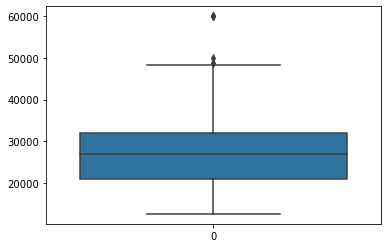

In [20]:
ax = sns.boxplot(data = cust['avg amount'])

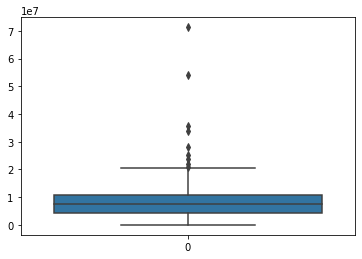

In [21]:
ax3 = sns.boxplot(data = cust['Income'])

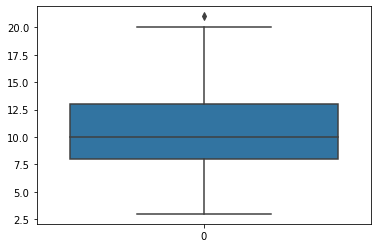

In [22]:
ax4 = sns.boxplot(data = cust['buytot'])

In [23]:
#making function to replace outlier
def outlier (x):
    sorted(x)
    q1, q3 = x.quantile([0.25, 0.75])
    IQR = q3 - q1
    lwr_bound = q1 - (1.5*IQR)
    upr_bound = q3 + (1.5*IQR)
    return lwr_bound, upr_bound

In [24]:
low, high = outlier(cust['Income'])
low2, high2 = outlier(cust['buytot'])
low3, high3 = outlier(cust['avg amount'])

In [25]:
#replacing outlier with upper bound and lower bound value
cust['Income'] = np.where(cust['Income']>high, high, cust['Income'])
cust['Income'] = np.where(cust['Income']<low, low, cust['Income'])
cust['buytot'] = np.where(cust['buytot']>high2, high2, cust['buytot'])
cust['buytot'] = np.where(cust['buytot']<low2, low2, cust['buytot'])
cust['avg amount'] = np.where(cust['avg amount']>high3, high3, cust['avg amount'])
cust['avg amount'] = np.where(cust['avg amount']<low3, low3, cust['avg amount'])

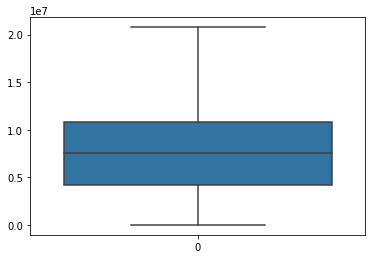

In [26]:
ax3 = sns.boxplot(data = cust['Income'])

In [27]:
cust2 = cust

In [28]:
cust = cust.drop(columns ={'CustomerID', 'kunjungan', 'loyal', 'Marital Status'}, axis = 1)
cust

,Age,Gender,Income,Cashew,Cheese Stick,Choco Bar,Coffee Candy,Crackers,Ginger Candy,Oat,Potato Chip,Thai Tea,Yoghurt,avg amount,buytot,__Married,__Single
0,44,0,3870000.0,0.0,4.0,0.0,2.0,2.0,1.0,3.0,1.0,4.0,4.0,21000.0,20.5,1,0
1,45,0,19680000.0,1.0,4.0,0.0,5.0,0.0,0.0,5.0,1.0,3.0,1.0,38800.0,20.0,1,0
2,28,0,6050000.0,4.0,6.0,3.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,34750.0,17.0,0,1
3,40,0,10650000.0,0.0,2.0,2.0,3.0,1.0,2.0,2.0,1.0,5.0,1.0,21000.0,17.0,1,0
4,23,0,2030000.0,1.0,3.0,2.0,1.0,1.0,0.0,2.0,2.0,5.0,2.0,30000.0,17.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,41,1,15840000.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,36200.0,4.0,1,0
443,22,1,4070000.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,48200.0,4.0,1,0
444,59,1,4440000.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,20800.0,4.0,1,0
445,25,0,3060000.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,46500.0,4.0,1,0


In [29]:
cust3 = cust

# KMEANS

In [30]:
scaler = StandardScaler()

In [31]:
# Method 2: Modify the existing DataFrame in place
cust[cust.columns] = scaler.fit_transform(cust[cust.columns])

In [32]:
cust

,Age,Gender,Income,Cashew,Cheese Stick,Choco Bar,Coffee Candy,Crackers,Ginger Candy,Oat,Potato Chip,Thai Tea,Yoghurt,avg amount,buytot,__Married,__Single
0,0.328572,-0.920384,-0.850361,-0.745805,2.176863,-0.931443,0.759693,0.764406,-0.181161,1.850362,0.142542,1.678074,2.791333,-0.819891,3.234938,0.560987,-0.550642
1,0.406488,-0.920384,2.180664,0.561548,2.176863,-0.931443,3.498265,-1.057937,-1.156814,3.782867,0.142542,0.907952,-0.088034,1.325429,3.075720,0.560987,-0.550642
2,-0.918084,-0.920384,-0.432421,4.483606,3.843057,2.214816,-0.153164,0.764406,-0.181161,-0.082142,0.142542,-0.632293,-1.047823,0.837309,2.120413,-1.782574,1.816061
3,0.016908,-0.920384,0.449471,-0.745805,0.510668,1.166063,1.672550,-0.146766,0.794491,0.884110,0.142542,2.448196,-0.088034,-0.819891,2.120413,0.560987,-0.550642
4,-1.307664,-0.920384,-1.203118,0.561548,1.343765,1.166063,-0.153164,-0.146766,-1.156814,0.884110,1.260370,2.448196,0.871755,0.264822,2.120413,-1.782574,1.816061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,0.094824,1.086503,1.444476,-0.745805,-1.155526,-0.931443,-1.066021,-1.057937,-0.181161,-1.048394,-0.975287,-1.402415,1.831544,1.012068,-2.019254,0.560987,-0.550642
443,-1.385580,1.086503,-0.812018,-0.745805,-0.322429,-0.931443,-0.153164,-1.057937,-1.156814,-1.048394,-0.975287,-0.632293,-0.088034,2.458351,-2.019254,0.560987,-0.550642
444,1.497311,1.086503,-0.741083,-0.745805,-1.155526,-0.931443,-0.153164,-1.057937,1.770143,-1.048394,-0.975287,-1.402415,-1.047823,-0.843995,-2.019254,0.560987,-0.550642
445,-1.151832,-0.920384,-1.005651,-0.745805,0.510668,-0.931443,-0.153164,-1.057937,-1.156814,-0.082142,-0.975287,-1.402415,-1.047823,2.253461,-2.019254,0.560987,-0.550642


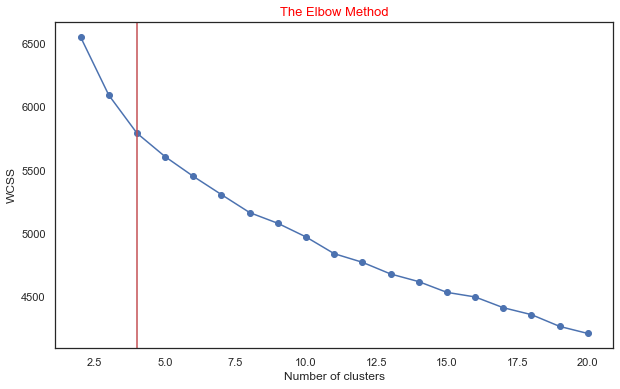

In [74]:
# membuat fungsi Elbow Method
sns.set_theme('notebook', style='white')
def elbowMethod(cust, k_min=2, k_max= 20):
    wcss = [] # Within Cluster Sum of Squares
    k_range = range(k_min, k_max + 1)

    for i in k_range:
      kmeans_test = KMeans(n_clusters = i, random_state = 42, init = 'k-means++')
      kmeans_test.fit(cust)
      wcss.append(kmeans_test.inertia_)

    fig, ax = plt.subplots(figsize=(10,6))
    ax.plot(k_range, wcss, marker='o')

    plt.axvline(x = 4, color = 'r')
    plt.title('The Elbow Method', fontsize = 13, color = 'red')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()
    
elbowMethod(cust)

### Melakukan Clustering

ditentukan kalau jumlah cluster adalah 5

In [58]:
kmeans = KMeans(n_clusters = 4, random_state = 42).fit(cust)
labels = kmeans.labels_

In [60]:
score = []

for cluster in range(1,10):
    kmeans = KMeans(n_clusters = 4, init="k-means++", random_state=42)
    kmeans.fit(cust)
    score.append(kmeans.inertia_)

print('n-cluster = 4')
print()
hasilcl = cust.copy()
hasilcl['kmeans_4cluster'] = labels
print('Cluster and its customers quantity :')
display(hasilcl.kmeans_4cluster.value_counts(ascending=True))
display(hasilcl)

n-cluster = 4

Cluster and its customers quantity :


0     94
2    105
3    106
1    142
Name: kmeans_4cluster, dtype: int64

,Age,Gender,Income,Cashew,Cheese Stick,Choco Bar,Coffee Candy,Crackers,Ginger Candy,Oat,Potato Chip,Thai Tea,Yoghurt,avg amount,buytot,__Married,__Single,kmeans_4cluster
0,0.328572,-0.920384,-0.850361,-0.745805,2.176863,-0.931443,0.759693,0.764406,-0.181161,1.850362,0.142542,1.678074,2.791333,-0.819891,3.234938,0.560987,-0.550642,0
1,0.406488,-0.920384,2.180664,0.561548,2.176863,-0.931443,3.498265,-1.057937,-1.156814,3.782867,0.142542,0.907952,-0.088034,1.325429,3.075720,0.560987,-0.550642,0
2,-0.918084,-0.920384,-0.432421,4.483606,3.843057,2.214816,-0.153164,0.764406,-0.181161,-0.082142,0.142542,-0.632293,-1.047823,0.837309,2.120413,-1.782574,1.816061,3
3,0.016908,-0.920384,0.449471,-0.745805,0.510668,1.166063,1.672550,-0.146766,0.794491,0.884110,0.142542,2.448196,-0.088034,-0.819891,2.120413,0.560987,-0.550642,0
4,-1.307664,-0.920384,-1.203118,0.561548,1.343765,1.166063,-0.153164,-0.146766,-1.156814,0.884110,1.260370,2.448196,0.871755,0.264822,2.120413,-1.782574,1.816061,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,0.094824,1.086503,1.444476,-0.745805,-1.155526,-0.931443,-1.066021,-1.057937,-0.181161,-1.048394,-0.975287,-1.402415,1.831544,1.012068,-2.019254,0.560987,-0.550642,2
443,-1.385580,1.086503,-0.812018,-0.745805,-0.322429,-0.931443,-0.153164,-1.057937,-1.156814,-1.048394,-0.975287,-0.632293,-0.088034,2.458351,-2.019254,0.560987,-0.550642,2
444,1.497311,1.086503,-0.741083,-0.745805,-1.155526,-0.931443,-0.153164,-1.057937,1.770143,-1.048394,-0.975287,-1.402415,-1.047823,-0.843995,-2.019254,0.560987,-0.550642,1
445,-1.151832,-0.920384,-1.005651,-0.745805,0.510668,-0.931443,-0.153164,-1.057937,-1.156814,-0.082142,-0.975287,-1.402415,-1.047823,2.253461,-2.019254,0.560987,-0.550642,2


In [61]:
cust2 = cust2.join(hasilcl['kmeans_4cluster'])
cust2

,CustomerID,kunjungan,loyal,Age,Gender,Marital Status,Income,Cashew,Cheese Stick,Choco Bar,...,Oat,Potato Chip,Thai Tea,Yoghurt,avg amount,buytot,__Married,__Single,kmeans_5cluster,kmeans_4cluster
0,156,21,1,44,0,Married,3870000.0,0.0,4.0,0.0,...,3.0,1.0,4.0,4.0,21000.0,20.5,1,0,3,0
1,392,20,1,45,0,Married,19680000.0,1.0,4.0,0.0,...,5.0,1.0,3.0,1.0,38800.0,20.0,1,0,3,0
2,365,20,1,28,0,Single,6050000.0,4.0,6.0,3.0,...,1.0,1.0,1.0,0.0,34750.0,17.0,0,1,0,3
3,44,19,1,40,0,Married,10650000.0,0.0,2.0,2.0,...,2.0,1.0,5.0,1.0,21000.0,17.0,1,0,3,0
4,13,19,1,23,0,Single,2030000.0,1.0,3.0,2.0,...,2.0,2.0,5.0,2.0,30000.0,17.0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,385,4,0,41,1,Married,15840000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,36200.0,4.0,1,0,2,2
443,180,4,0,22,1,Married,4070000.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,48200.0,4.0,1,0,2,2
444,259,4,0,59,1,Married,4440000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,20800.0,4.0,1,0,4,1
445,371,4,0,25,0,Married,3060000.0,0.0,2.0,0.0,...,1.0,0.0,0.0,0.0,46500.0,4.0,1,0,2,2


In [62]:
cust2.columns

Index(['CustomerID', 'kunjungan', 'loyal', 'Age', 'Gender', 'Marital Status',
       'Income', 'Cashew', 'Cheese Stick', 'Choco Bar', 'Coffee Candy',
       'Crackers', 'Ginger Candy ', 'Oat', 'Potato Chip', 'Thai Tea',
       'Yoghurt', 'avg amount', 'buytot', '__Married', '__Single',
       'kmeans_5cluster', 'kmeans_4cluster'],
      dtype='object')

In [69]:
num = cust2[['kunjungan', 'Age', 'Income', 'Cashew', 'Cheese Stick', 
             'Choco Bar', 'Coffee Candy', 'Crackers', 'Ginger Candy ', 'Oat', 
             'Potato Chip', 'Thai Tea', 'Yoghurt', 'avg amount', 'buytot',
             'kmeans_4cluster']]
nonum = cust2[['loyal', 'Gender', 'Marital Status', 'kmeans_4cluster']]

In [70]:
#mencari modus untuk non numeric data
nonumgroup = nonum.groupby('kmeans_4cluster').apply(lambda x: x.mode().iloc[0])
nonumgroup

,loyal,Gender,Marital Status,kmeans_4cluster
kmeans_4cluster,,,,
0,1.0,0.0,Married,0.0
1,0.0,0.0,Married,1.0
2,0.0,0.0,Married,2.0
3,0.0,0.0,Single,3.0


In [71]:
numgroup = num.groupby('kmeans_4cluster').mean()
numgroup

,kunjungan,Age,Income,Cashew,Cheese Stick,Choco Bar,Coffee Candy,Crackers,Ginger Candy,Oat,Potato Chip,Thai Tea,Yoghurt,avg amount,buytot
kmeans_4cluster,,,,,,,,,,,,,,,
0,14.744681,44.62766,1.011277e+07,0.978723,2.042553,0.851064,1.851064,1.829787,1.308511,1.436170,1.287234,2.063830,1.095745,27990.425532,13.888298
1,10.000000,42.00000,8.651919e+06,0.373239,1.028169,0.577465,0.802817,0.922535,1.500000,0.985915,0.605634,2.190141,1.014085,21814.788732,9.422535
2,9.419048,42.92381,9.826786e+06,0.485714,1.142857,1.266667,1.133333,0.828571,0.552381,0.876190,0.885714,0.990476,1.257143,36346.428571,8.152381
3,11.556604,29.40566,4.731958e+06,0.556604,1.528302,0.962264,1.084906,1.216981,1.283019,1.113208,0.849057,1.933962,1.028302,27194.811321,10.594340


In [72]:
colors = plt.cm.tab20.colors

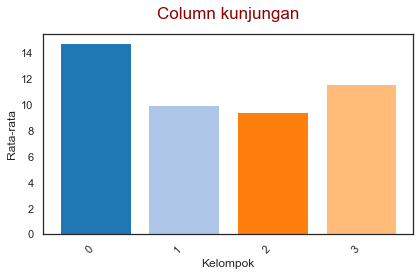

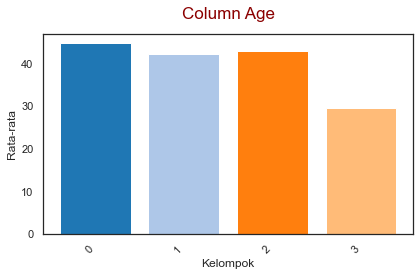

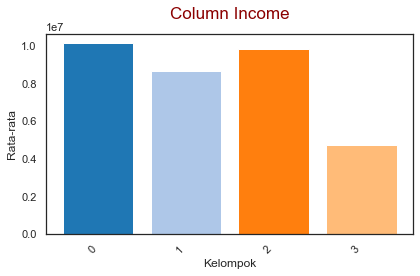

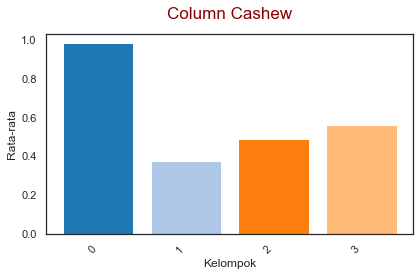

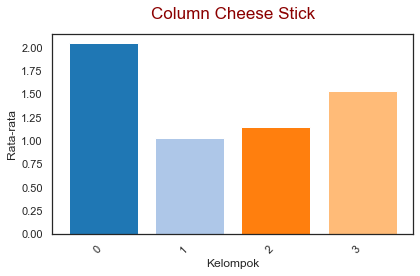

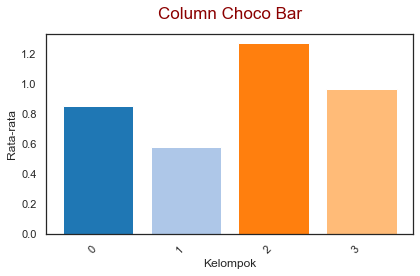

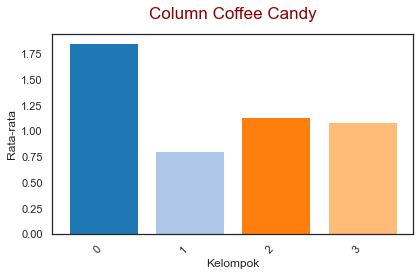

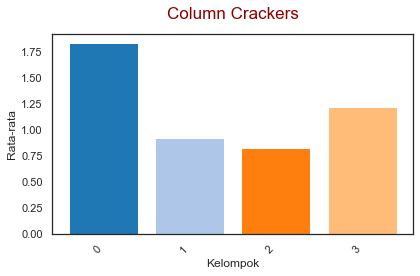

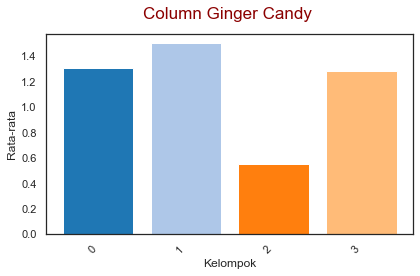

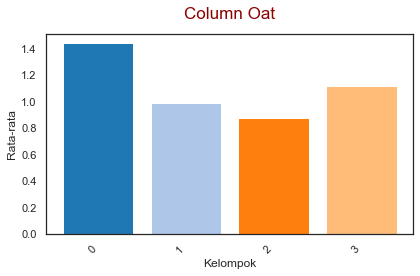

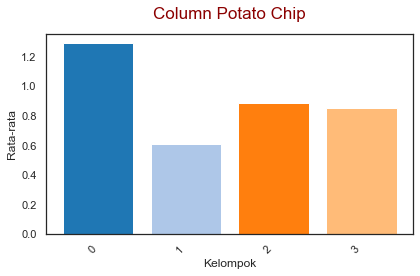

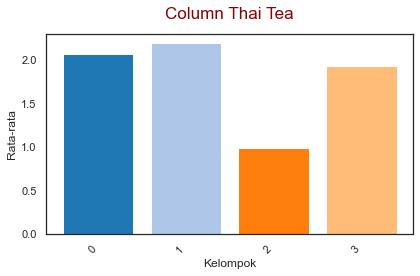

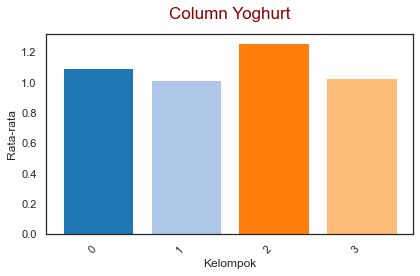

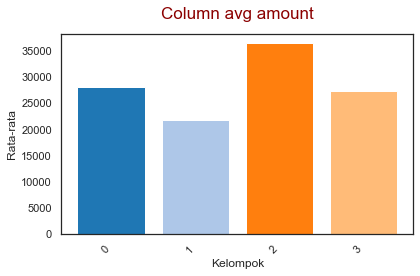

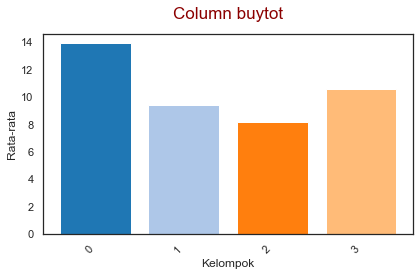

In [75]:
for col in numgroup.columns[0:]:
    plt.figure()
    x_labels = numgroup[col].index
    x_pos = range(len(x_labels))
    
    plt.bar(x_pos, numgroup[col], color=colors)

    plt.title(f'Column {col}', fontsize=17, pad=15, color='darkred')
    plt.xlabel('Kelompok')
    plt.ylabel('Rata-rata')
    
    # Customize the x-axis tick labels
    plt.xticks(x_pos, x_labels, rotation=45, ha='right')
    
    plt.tight_layout()  # To make sure the labels fit properly
    plt.show()

+ **Kelompok 1:** merupakan kustomer loyal. Memiliki income dan rata-rata umur yang tinggi (paling tinggi) dan umumnya sudah menikah. Memiliki rata-rata konsumsi yang tinggi dengan rata-rata pembayaran yang sedang. didominasi oleh konsumen laki-laki.
+ **Kelompok 2:** bukanlah kustomer loyal. Memiliki income dan rata-rata umur yang sedang. Umumnya sudah menikah. Memiliki rata-rata konsumsi yang sedang, rata-rata pembayaran yang rendah, dan lebih sering membeli produk thai tea dan ginger candy. didominasi oleh konsumen laki-laki.
+ **Kelompok 3:** bukanlah kustomer loyal. Memiliki income dan rata-rata umur yang tinggi. Umumnya sudah menikah. Memiliki rata-rata pembayaran yang tinggi, namun jumlah konsumsi yang rendah (sepertinya lebih banyak membeli produk berharga tinggi) dan lebih sering membeli yoghurt dan choco bar. didominasi oleh konsumen laki-laki.
+ **Kelompok 4:** bukanlah kustomer loyal, namun memiliki jumlah kunjungan lebih dari 10 kali dalam 1 tahun. Memiliki income sedang dan rata-rata umur yang rendah. Umumnya masih single. Memiliki rata-rata pembayaran dan konsumsi yang sedang dan lebih sering membeli ginger candy (tidak sebanyak 1 dan 2). didominasi oleh konsumen laki-laki.